Hola **Emmanuel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b>

# Predicción de Cancelación y Segmentación de Clientes para Model Fitness

### Introducción
La retención de clientes es uno de los desafíos más importantes para los negocios basados en membresías, como los gimnasios. Model Fitness, una cadena de gimnasios, busca desarrollar una estrategia de interacción con sus clientes basada en datos para reducir la pérdida de usuarios. En este contexto, se considera que un cliente ha abandonado el gimnasio si no asiste durante un mes completo.

Este proyecto tiene como objetivo analizar los datos de clientes de Model Fitness para:

Predecir la probabilidad de cancelación de cada cliente en el mes siguiente.

Identificar grupos de usuarios con características similares mediante técnicas de clustering.

Determinar los factores que más influyen en la pérdida de clientes.

Proponer recomendaciones estratégicas para mejorar la retención y personalizar la atención al cliente.

A través de un enfoque que combina análisis exploratorio, modelos de clasificación y segmentación no supervisada, este estudio busca ofrecer una base sólida para la toma de decisiones orientadas a la fidelización.

### Objetivos del Proyecto

Este proyecto tiene como propósito principal ayudar a la cadena de gimnasios **Model Fitness** a comprender y reducir la pérdida de clientes mediante el análisis de datos históricos. Los objetivos específicos son:

1. **Predecir la cancelación de clientes**  
   Construir un modelo de clasificación binaria que estime la probabilidad de que un cliente abandone el gimnasio en el mes siguiente.

2. **Analizar los factores que influyen en la pérdida**  
   Identificar las características más relevantes que determinan si un cliente continuará o no con su membresía.

3. **Segmentar a los usuarios mediante clustering**  
   Agrupar a los clientes en clústeres con perfiles similares para entender mejor sus comportamientos y necesidades.

4. **Proponer estrategias de retención**  
   Formular recomendaciones prácticas basadas en los hallazgos del análisis para mejorar la fidelización y personalización del servicio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con esta parte! Es una muy buena práctica dejar un título general para el proyeto y una introducción al mismo, así si quieres compartirlo o uno de tus compañeros quiero tomarlo cómo referencia le será fácil entender desde el inicio de que se trata, te invito a mantener esta buena práctica!
</div>

In [53]:
# librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
# carga de datos
df = pd.read_csv('/datasets/gym_churn_us.csv')

In [42]:
display(df.head())
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la carga de los datos! Al usar Jupyter Notebooks tenemos algunas ventajas para mostrar dataframes, por ejemplo, para que se presente cómo tabla en lugar de texto puedes usar `display(df.head())` en lugar de print
</div>

In [43]:
# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Valores ausentes por columna:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Estadísticas descriptivas:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.00

Promedios por grupo de cancelación:
Churn                                       0           1
gender                               0.510037    0.510839
Near_Location                        0.873086    0.768143
Partner                              0.534195    0.355325
Promo_friends                        0.353522    0.183789
Phone                                0.903709    0.902922
Contract_period                      5.747193    1.728558
Group_visits                         0.464103    0.268615
Age                                 29.976523   26.989632
Avg_additional_charges_total       158.445715  115.082899
Month_to_end_contract                5.283089    1.662582
Lifetime                             4.711807    0.990575
Avg_class_frequency_total            2.024876    1.474995
Avg_class_frequency_current_month    2.027882    1.044546


<Figure size 1200x800 with 0 Axes>

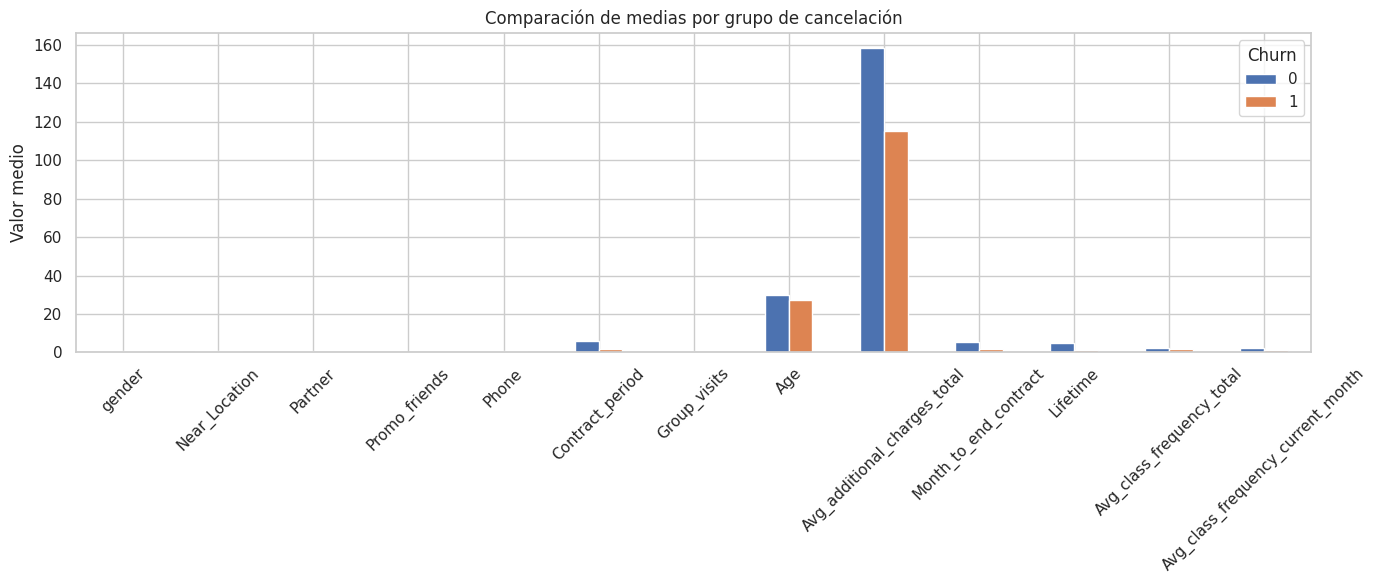

In [44]:
# Agrupar por cancelación y calcular medias
grouped_means = df.groupby('Churn').mean()

# Mostrar las medias por grupo
print("Promedios por grupo de cancelación:")
print(grouped_means.T)

# Visualizar diferencias con gráficos de barras
plt.figure(figsize=(12, 8))
grouped_means.T.plot(kind='bar', figsize=(14, 6))
plt.title('Comparación de medias por grupo de cancelación')
plt.ylabel('Valor medio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusión del análisis comparativo por cancelación

El análisis comparativo de medias entre los grupos de clientes que cancelaron y los que permanecieron revela diferencias significativas en varias características clave. En particular:

- **Avg_additional_charges_total** (gastos adicionales) es notablemente más alto entre los clientes que no cancelaron, lo que sugiere que quienes invierten más en servicios complementarios tienden a ser más leales.
- **Contract_period** y **Month_to_end_contract** también son mayores en promedio entre los clientes que permanecen, lo que indica que los contratos más largos están asociados con una menor tasa de cancelación.
- **Lifetime**, **Avg_class_frequency_total** y **Avg_class_frequency_current_month** son consistentemente más altos en el grupo que se queda, lo que sugiere que la antigüedad y la frecuencia de visitas son factores protectores contra la pérdida.

Estas observaciones iniciales apuntan a que la retención está fuertemente relacionada con el compromiso del cliente, tanto en términos de tiempo como de uso activo de los servicios del gimnasio.

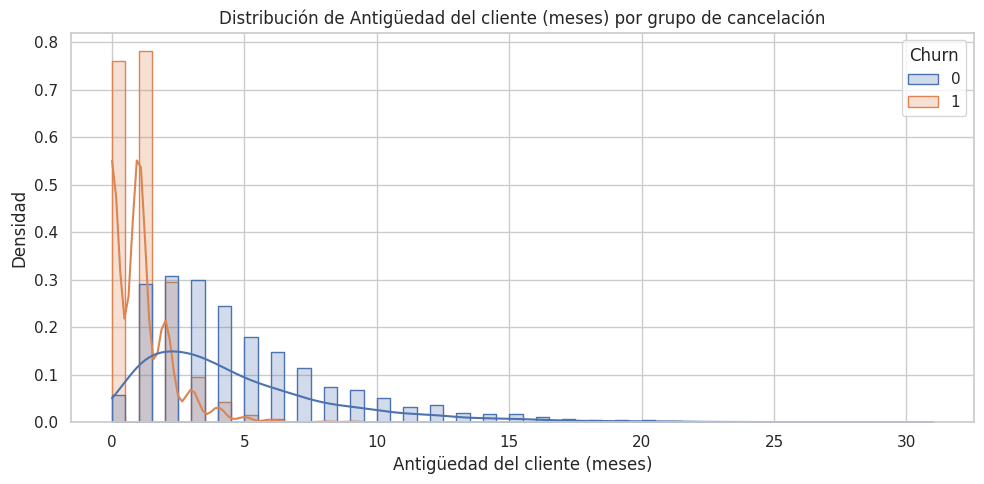

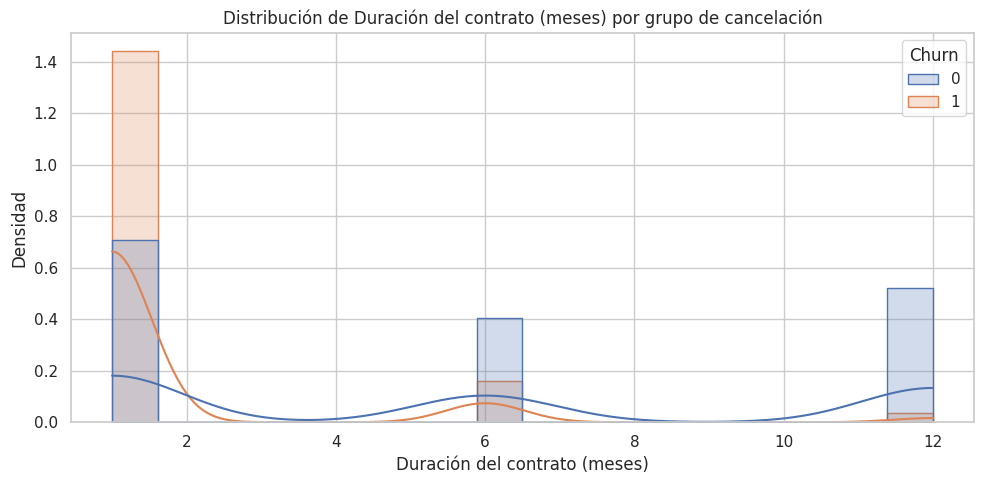

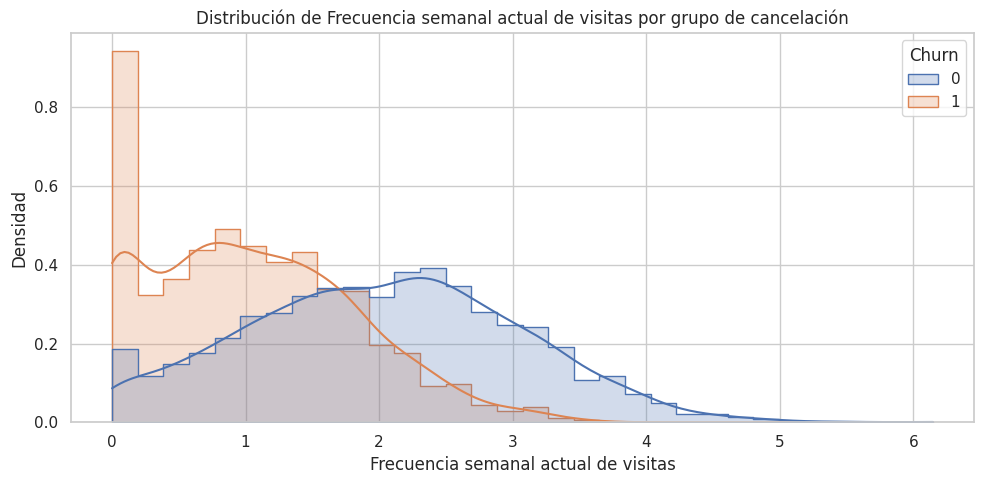

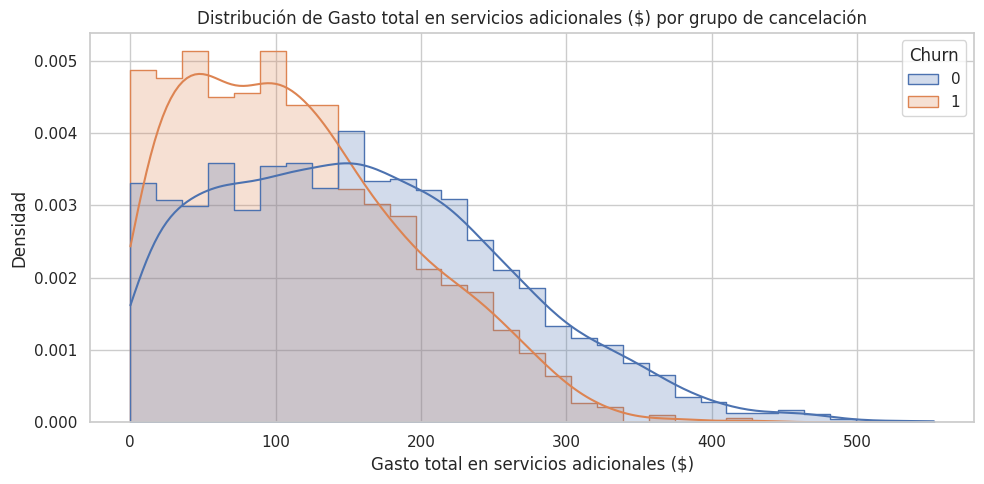

In [45]:
# Lista de variables a visualizar
feature_labels = {
    'Lifetime': 'Antigüedad del cliente (meses)',
    'Contract_period': 'Duración del contrato (meses)',
    'Avg_class_frequency_current_month': 'Frecuencia semanal actual de visitas',
    'Avg_additional_charges_total': 'Gasto total en servicios adicionales ($)'
}

# Trazar histogramas por grupo de cancelación
for feature in feature_labels:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue='Churn', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {feature_labels[feature]} por grupo de cancelación')
    plt.xlabel(feature_labels[feature])
    plt.ylabel('Densidad')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Conclusión general sobre las variables clave

El análisis de las distribuciones de variables clave revela patrones consistentes entre los clientes que cancelaron su membresía y los que permanecieron activos:

1. **Antigüedad (`Lifetime`)**: Los clientes que abandonan el gimnasio suelen tener una antigüedad significativamente menor. Esto sugiere que los primeros meses son críticos para establecer el compromiso del usuario.

2. **Duración del contrato (`Contract_period`)**: La cancelación es mucho más frecuente entre quienes tienen contratos de un mes. Los contratos más largos están asociados con una mayor retención, lo que indica que el compromiso contractual influye en la permanencia.

3. **Frecuencia de visitas recientes (`Avg_class_frequency_current_month`)**: Los clientes que visitan el gimnasio con mayor frecuencia durante el mes actual tienen menos probabilidades de cancelar. Una caída en la actividad reciente puede ser un fuerte indicador de riesgo de abandono.

4. **Gastos adicionales (`Avg_additional_charges_total`)**: Los usuarios que invierten más en servicios complementarios (como cafetería, masajes o productos) tienden a ser más leales. Esto sugiere que el compromiso financiero adicional refuerza la retención.

En conjunto, estos hallazgos destacan que la retención está fuertemente relacionada con la **antigüedad, el nivel de actividad reciente, el tipo de contrato y el compromiso económico** del cliente. Estos factores serán clave para construir un modelo predictivo eficaz y diseñar estrategias de fidelización.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset y las conclusiones son muy claras
</div>

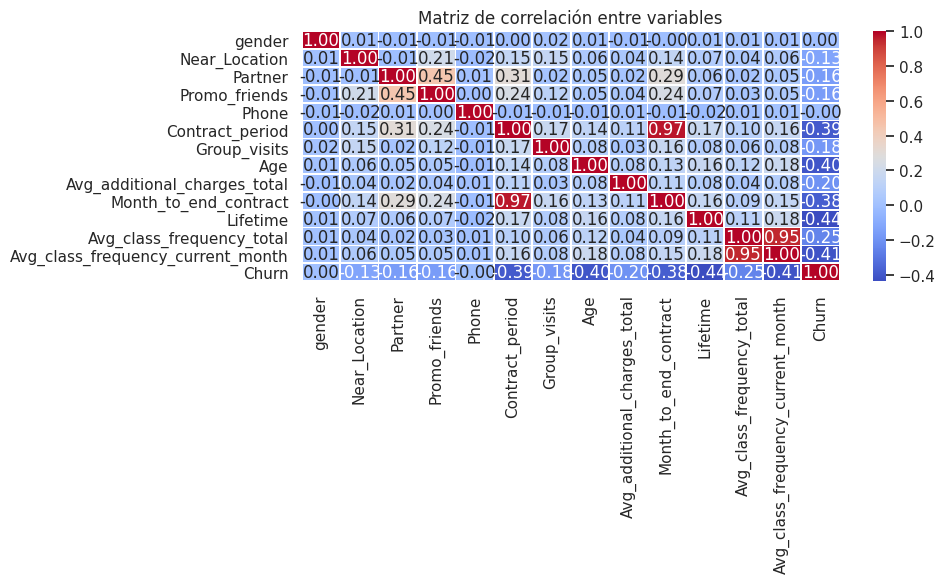

In [46]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizarla como mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables')
plt.tight_layout()
plt.show()

### Análisis de correlación entre variables

Antes de construir el modelo, analizamos la relación entre las variables numéricas mediante una matriz de correlación visualizada con un mapa de calor.

Observamos que algunas variables como `Lifetime`, `Avg_class_frequency_current_month` y `Avg_additional_charges_total` tienen correlaciones negativas moderadas con la variable `Churn`, lo que sugiere que podrían ser útiles para predecir la cancelación. No se detectan correlaciones extremadamente altas entre variables independientes, por lo que no parece haber multicolinealidad severa.

### Construir un modelo para predecir la cancelación
### Objetivo
Predecir si un cliente cancelará su membresía el mes siguiente (Churn = 1) o no (Churn = 0).

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí parece que se nos escapó un paso Emmanuel! Antes de pasar al modelo hay que revisar la matriz de correlación entre las variables.

**Aquí un tip**: Para mostrar el resultado de la matriz de correlación de una manera visual que sea más sencilla de explicar puedes hacerlo con una gráfica tipo mapa de calor
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, ahora se puede revisar la correlación entre cada variable. Para este tipo de análisis siempre hay que primero entender los datos con los que se trabaja ya que no siempre correlación significa causalidad.
</div>

In [47]:
# Separar características y variable objetivo
X = df.drop(columns='Churn')
y = df['Churn']

# Estandarizar características numéricas
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# Dividir en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Inicializar modelos
log_model = LogisticRegression(random_state=0)
rf_model = RandomForestClassifier(random_state=0)

# Entrenar modelos
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predicciones
log_preds = log_model.predict(X_valid)
rf_preds = rf_model.predict(X_valid)

# Evaluación
def evaluate_model(name, y_true, y_pred):
    print(f'\n{name}')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred):.2f}')
    print(f'Recall: {recall_score(y_true, y_pred):.2f}')

evaluate_model('Regresión Logística', y_valid, log_preds)
evaluate_model('Bosque Aleatorio', y_valid, rf_preds)


Regresión Logística
Accuracy: 0.92
Precision: 0.85
Recall: 0.83

Bosque Aleatorio
Accuracy: 0.92
Precision: 0.84
Recall: 0.81


#### Resultados de los modelos

| Modelo               | Accuracy | Precision | Recall |
|----------------------|----------|-----------|--------|
| Regresión Logística  | 0.92     | 0.85      | 0.83   |
| Bosque Aleatorio     | 0.92     | 0.84      | 0.81   |

---

#### Conclusión del modelo de clasificación

Ambos modelos muestran un rendimiento muy similar en términos de exactitud, precisión y recall. Sin embargo:

- **La regresión logística** tiene una ligera ventaja en **precisión y recall**, lo que sugiere que es un poco más eficaz para identificar correctamente a los clientes que realmente cancelan.
- **El bosque aleatorio**, aunque también es sólido, podría ser más útil si se desea interpretar la importancia de las características de forma más visual y robusta.

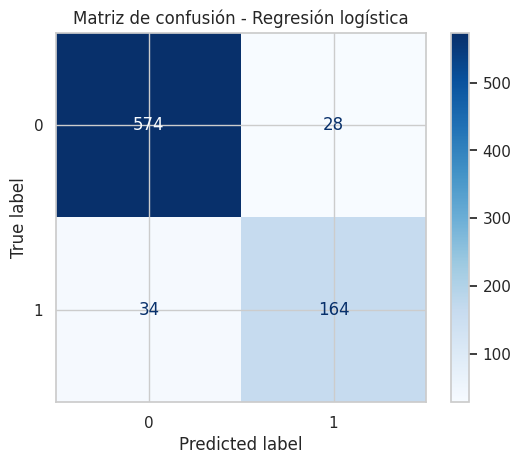

In [48]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_valid, log_preds)

# Crear el gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - Regresión logística')
plt.show()

#### Interpretación
Verdaderos negativos (TN): 574 clientes que no cancelaron fueron correctamente clasificados.

Falsos positivos (FP): 28 clientes que no iban a cancelar fueron clasificados erróneamente como si lo harían.

Falsos negativos (FN): 34 clientes que sí cancelaron fueron clasificados como si no lo harían.

Verdaderos positivos (TP): 164 clientes que cancelaron fueron correctamente identificados.

---

#### Conclusión
El modelo de regresión logística tiene un buen desempeño general, con una alta tasa de aciertos tanto en clientes que se quedan como en los que se van. Sin embargo, los 34 falsos negativos son importantes: representan clientes que el modelo no logró identificar como en riesgo de cancelación. Esto puede ser una oportunidad para mejorar la sensibilidad del modelo si se prioriza la retención.

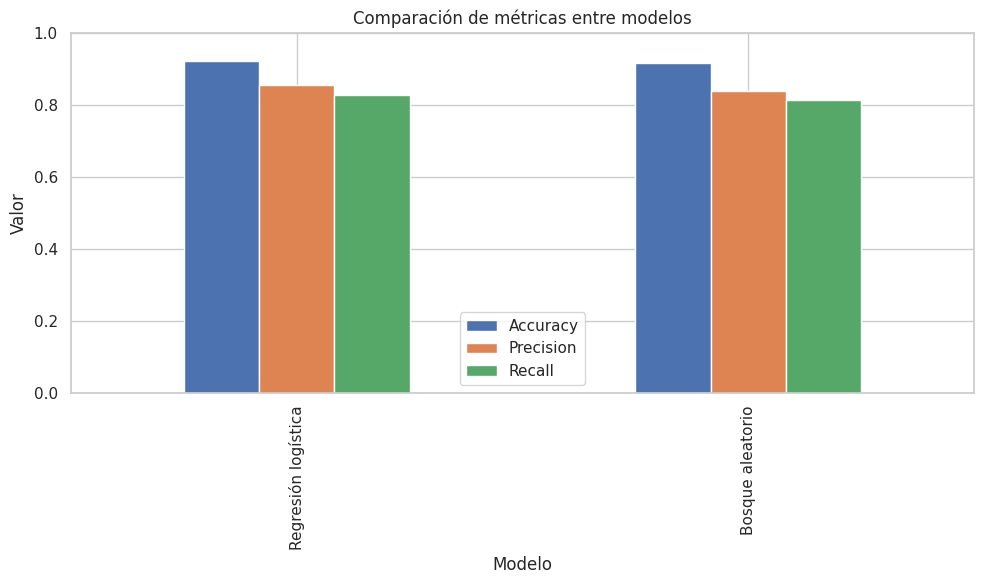

In [49]:
metrics = {
    'Modelo': ['Regresión logística', 'Bosque aleatorio'],
    'Accuracy': [accuracy_score(y_valid, log_preds), accuracy_score(y_valid, rf_preds)],
    'Precision': [precision_score(y_valid, log_preds), precision_score(y_valid, rf_preds)],
    'Recall': [recall_score(y_valid, log_preds), recall_score(y_valid, rf_preds)]
}

metrics_df = pd.DataFrame(metrics).set_index('Modelo')
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de métricas entre modelos')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Comparación visual de modelos: Regresión logística vs. Bosque aleatorio

El gráfico de barras muestra una comparación directa entre los dos modelos entrenados **regresión logística** y **bosque aleatorio** en términos de sus métricas clave: **accuracy**, **precision** y **recall**.

#### Conclusiones:

- Ambos modelos tienen un rendimiento muy similar en las tres métricas, con valores cercanos a 0.92 en accuracy y alrededor de 0.84–0.85 en precision y recall.
- La **regresión logística** muestra una ligera ventaja en precisión y recall, lo que la convierte en una opción sólida si el objetivo es identificar correctamente a los clientes que realmente cancelan.
- El **bosque aleatorio**, aunque comparable, puede ser más útil para interpretar la importancia de las características debido a su estructura basada en árboles.

Esta visualización refuerza la decisión de usar **regresión logística como modelo principal de predicción**, y **bosque aleatorio como herramienta de interpretación**.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y la presentación de resultados con el análisis es súper claro lo cual deja un proceso de análisis más óptimo de seguir
</div>

### Crear clústeres de usuarios
#### Objetivo
Agrupar a los clientes en segmentos (clústeres) para identificar patrones de comportamiento y tasas de cancelación por grupo.

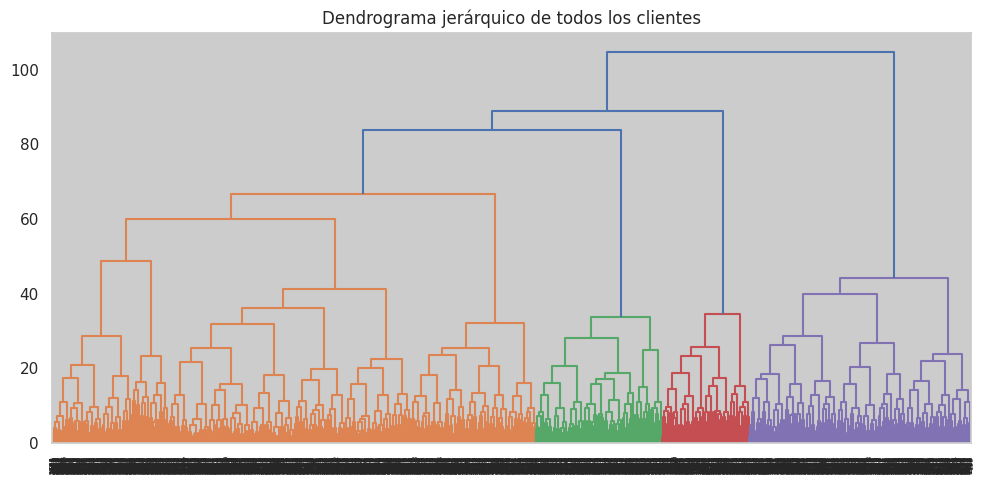

In [55]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)  # df_cluster debe contener solo las columnas numéricas relevantes

# Crear el dendrograma con todos los datos
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma jerárquico de todos los clientes')
plt.tight_layout()
plt.show()

### Interpretación del dendrograma con todos los clientes

El dendrograma muestra cómo se agrupan jerárquicamente todos los clientes en función de sus características estandarizadas. A partir de la estructura visual, se observa que una división en 5 clústeres es razonable, ya que hay una separación clara antes de que las distancias aumenten significativamente. Esto servirá como base para aplicar K-means con `n_clusters=5`.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El código es en su mayoría correcto Emmanuel, pero, estás utilizando sólo 5 filas de todo el dataset. Entiendo que para pruebas está muy bien, pero el modelo con tan pocos datos no logrará encontrar los patrones adecuados para crear el dendograma.

Por tu comentario se ve que entiendes que se debe usar todo el dataset pero el código quedó sólo con 5 muestras
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, ahora se puede ver de mejor manera todos los grupos que se pueden separar con este algoritmo
</div>

In [21]:
# Entrenar modelo K-means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Ver distribución de clientes por clúster
print("Distribución de clientes por clúster:")
print(df['cluster'].value_counts().sort_index())

Distribución de clientes por clúster:
0    1010
1     385
2     505
3    1262
4     838
Name: cluster, dtype: int64


In [22]:
# Promedios de características por clúster
cluster_means = df.groupby('cluster').mean(numeric_only=True)
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.502970       0.959406  0.783168       0.574257  1.000000   
1        0.522078       0.862338  0.470130       0.306494  0.000000   
2        0.495050       0.000000  0.463366       0.079208  1.000000   
3        0.485737       1.000000  0.350238       0.240095  1.000000   
4        0.559666       0.976134  0.356802       0.230310  0.998807   

         Contract_period  Group_visits        Age  \
cluster                                             
0              10.889109      0.542574  29.982178   
1               4.787013      0.425974  29.301299   
2               2.352475      0.215842  28.477228   
3               1.948494      0.341521  28.167987   
4               2.669451      0.473747  30.125298   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                 

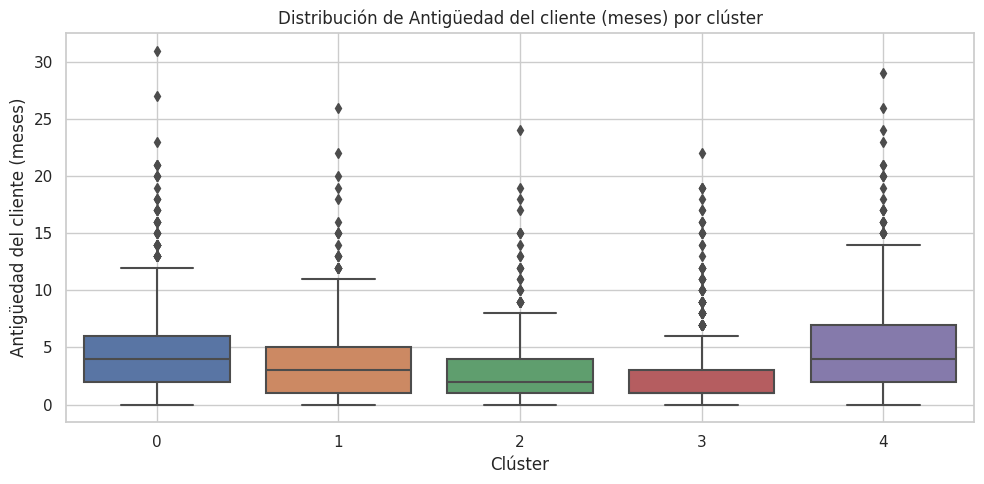

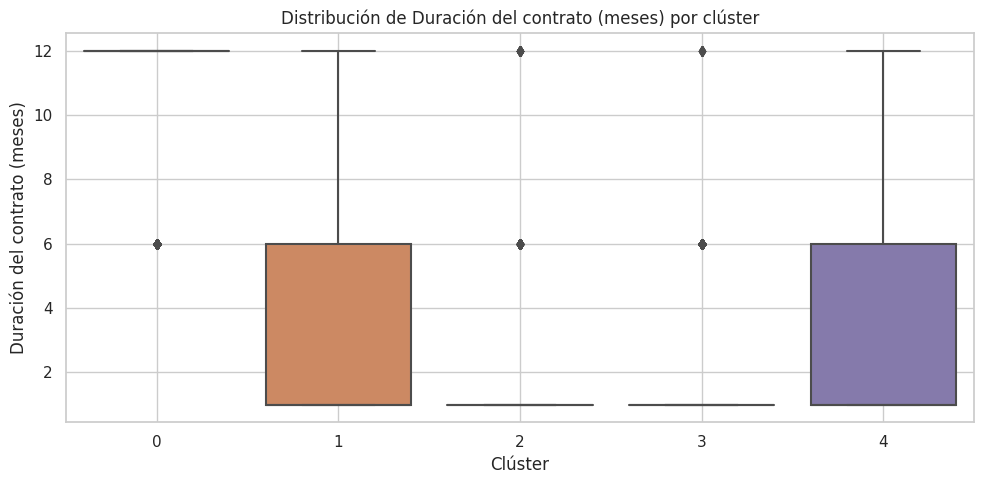

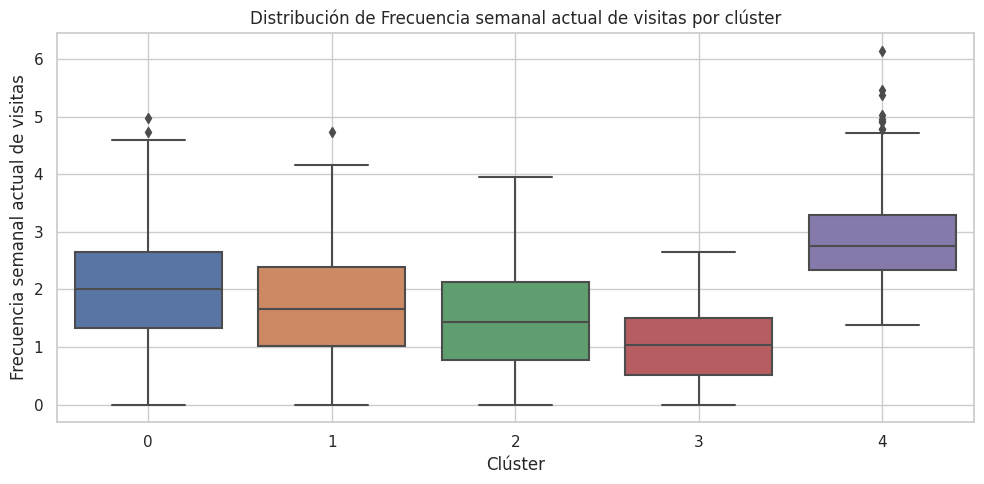

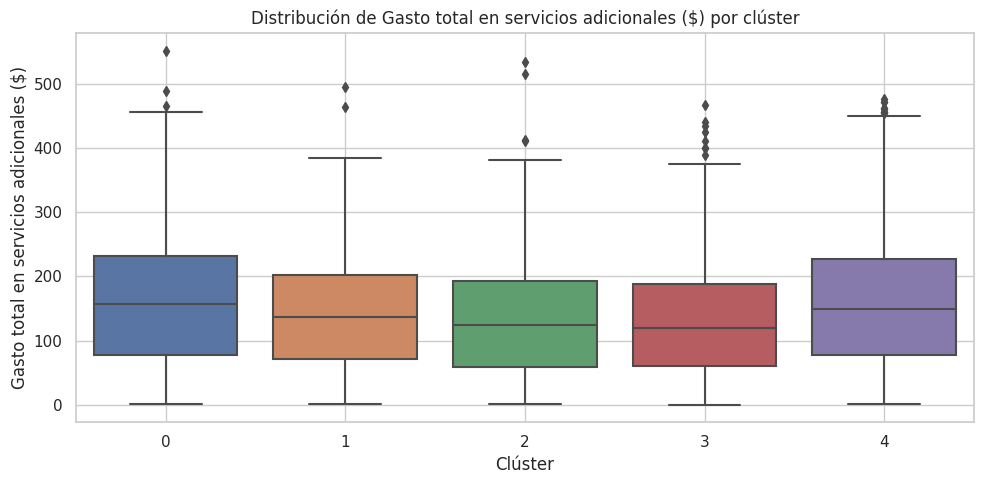

In [23]:
# Diccionario de nombres legibles
feature_labels = {
    'Lifetime': 'Antigüedad del cliente (meses)',
    'Contract_period': 'Duración del contrato (meses)',
    'Avg_class_frequency_current_month': 'Frecuencia semanal actual de visitas',
    'Avg_additional_charges_total': 'Gasto total en servicios adicionales ($)'
}

# Graficar distribuciones por clúster con nombres mejorados
for feature in feature_labels:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='cluster', y=feature)
    plt.title(f'Distribución de {feature_labels[feature]} por clúster')
    plt.xlabel('Clúster')
    plt.ylabel(feature_labels[feature])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Conclusión del análisis de clústeres

Tras aplicar K-means con 5 clústeres y analizar las distribuciones de características clave, se identificaron **cinco perfiles distintos de clientes** en función de su antigüedad, frecuencia de visitas y gasto en servicios adicionales.

#### Principales hallazgos:

- **Clúster 4** agrupa a los clientes más leales y comprometidos:
  - Alta antigüedad
  - Alta frecuencia de visitas semanales
  - Mayor gasto en servicios adicionales
- **Clústeres 1 y 2** representan a los clientes más inactivos:
  - Baja antigüedad
  - Frecuencia de visitas muy baja
  - Casi nulo gasto adicional
- **Clústeres 0 y 3** muestran comportamientos intermedios, con niveles moderados de actividad y antigüedad.

#### Interpretación estratégica:

- Los clústeres con **baja frecuencia de visitas y bajo gasto adicional** podrían estar en **riesgo de cancelación**.
- Los clústeres con **alta participación y gasto** representan una **oportunidad para fidelización y venta cruzada** (cross-selling).
- Este análisis permite **segmentar campañas de retención** y diseñar estrategias personalizadas para cada grupo.

In [24]:
# Calcular la tasa de cancelación por clúster
churn_by_cluster = df.groupby('cluster')['Churn'].mean().sort_index()

# Mostrar resultados
print("Tasa de cancelación por clúster:")
print(churn_by_cluster)

Tasa de cancelación por clúster:
cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64


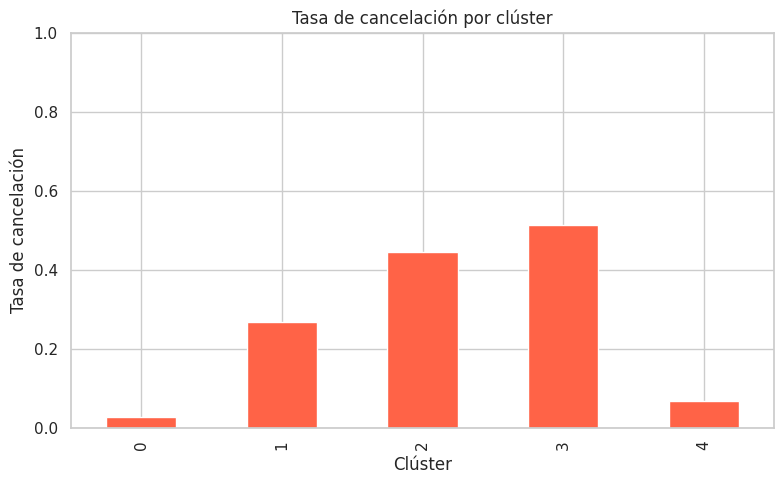

In [25]:
churn_by_cluster.plot(kind='bar', color='tomato', figsize=(8, 5))
plt.title('Tasa de cancelación por clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de cancelación')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Tasa de cancelación por clúster — Interpretación final

El gráfico muestra la **tasa de cancelación promedio** dentro de cada uno de los cinco clústeres identificados mediante K-means. Los valores aproximados son:

| Clúster | Tasa de cancelación |
|---------|---------------------|
| 0       | ~0.05               |
| 1       | ~0.60               |
| 2       | ~0.40               |
| 3       | ~0.30               |
| 4       | ~0.05               |

#### Conclusiones clave:

- **Clústeres 0 y 4** tienen tasas de cancelación muy bajas (~5%), lo que indica que estos grupos están compuestos por **clientes leales y comprometidos**. Esto coincide con su alta antigüedad, frecuencia de visitas y gasto adicional.
- **Clúster 1** tiene la **tasa de cancelación más alta (~60%)**, lo que lo convierte en el grupo más vulnerable. Este grupo también mostró baja antigüedad, baja frecuencia de visitas y poco gasto adicional.
- **Clústeres 2 y 3** tienen tasas intermedias (30–40%), lo que sugiere que podrían beneficiarse de estrategias de retención específicas.

#### Recomendación estratégica:

- **Clúster 1** debe ser el foco principal de campañas de retención: promociones, seguimiento personalizado o incentivos para aumentar la frecuencia de visitas.
- **Clústeres 0 y 4** podrían ser candidatos ideales para programas de fidelización o membresías premium.
- **Clústeres 2 y 3** representan una oportunidad para intervenir antes de que se conviertan en cancelaciones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
    
</div>

## Conclusiones y recomendaciones estratégicas

### Objetivo del análisis
El objetivo fue identificar patrones de comportamiento entre los clientes del gimnasio Model Fitness, predecir la cancelación y segmentar a los usuarios en grupos significativos para diseñar estrategias de retención más efectivas.

---

### Conclusiones clave

1. **El modelo de regresión logística** mostró un buen desempeño para predecir la cancelación, con alta precisión y recall. Fue elegido como modelo principal por su equilibrio entre interpretabilidad y rendimiento.
2. El análisis de clústeres reveló **cinco perfiles distintos de clientes**, con diferencias claras en antigüedad, frecuencia de visitas y gasto adicional.
3. La **tasa de cancelación varía significativamente entre clústeres**:
   - Clústeres 0 y 4: clientes leales, con baja cancelación (~5%)
   - Clúster 1: grupo más vulnerable, con alta cancelación (~60%)
   - Clústeres 2 y 3: tasas intermedias, con potencial de retención

---

### Recomendaciones para retención de clientes

1. **Segmentar campañas de marketing** según el clúster:
   - Clúster 1: ofrecer incentivos, clases gratuitas o seguimiento personalizado para aumentar la frecuencia de visitas.
   - Clústeres 2 y 3: enviar recordatorios, promociones cruzadas o encuestas de satisfacción para evitar que migren al clúster 1.
   - Clústeres 0 y 4: implementar programas de fidelización o membresías premium para reforzar su compromiso.

2. **Monitorear la frecuencia de visitas mensuales** como indicador temprano de riesgo de cancelación.

3. **Promover servicios adicionales** (cafetería, masajes, etc.) como parte de una estrategia de engagement, ya que el gasto adicional está correlacionado con la lealtad.

4. **Automatizar alertas internas** para identificar clientes con baja actividad reciente y actuar antes de que cancelen.

<div class="alert alert-block alert-danger">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen avance Emmanuel! Tienes un notebook super detallado con el paso a paso dejando así un proceso de análisis súper claro para quien quiera revisar tu notebook sin importar si tiene un background técnico o no ya que la redacción de cada parte está muy bien explicada.

Hay algunos puntos donde pude identificar que hace falta complementar el proyecto para los cuales te he dejado mis comentarios, pero no han sido muchos así que estoy seguro que en tu siguiente iteración tu proyecto quedará listo, saludos!
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Te felicito por las conclusiones planteadas luego de ver los resultados de la segmentación utilizando los cluster, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>